In [1]:
# xmlrpc_client.ipynb

import xmlrpc.client
import pickle
import pandas as pd

server = xmlrpc.client.ServerProxy("http://localhost:7070")
stats_server = xmlrpc.client.ServerProxy("http://localhost:8018")
stats2_server = xmlrpc.client.ServerProxy("http://localhost:6060")

print ('Ping', server.ping())
print ('Server datetime', server.now())
# print ('View, type, value:', server.type(2))
# print ('View, type, value:', server.type(2.))
# print ('View, type, value:', server.type('My string'))
# print ('View, type, value:', server.type("My string"))
# print ('View, type, value:', server.type([1,2,3]))
# print ('View, type, value:', server.type(["one", "two", "three"]))

# print( 'Sum 2 + 3 :', server.sum(2, 3))
# print( 'Sum 2 ^ 3 :', server.pow(2, 3))

Ping True
Server datetime 20231204T21:17:21


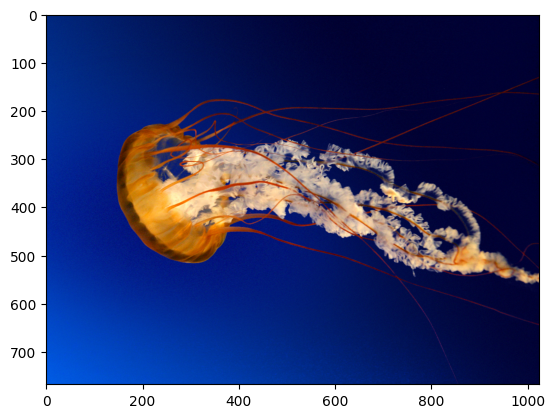

In [2]:
from PIL import Image # Работа с изображением
from pylab import * # Отображение
import xmlrpc.client

# Режим отображения внутри ноутбука
%matplotlib inline
# img = Image.open('11.bmp')
img = Image.open('Jellyfish.jpg')

img_arr = array(img)

# Исходное изображение
gray()
imshow(img_arr)

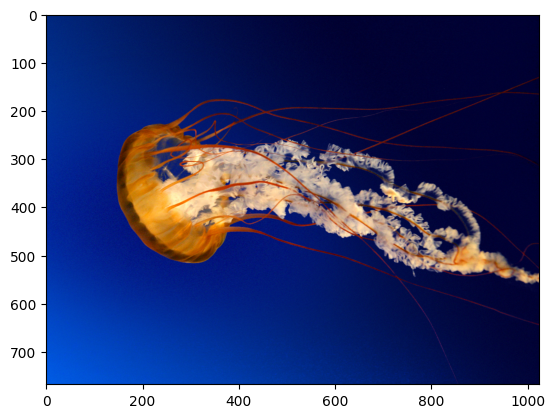

In [3]:
# Тест бинарной передачи данных
#pimg = img_arr.dumps()
pimg = pickle.dumps(img_arr) # универсально

img_bin = xmlrpc.client.Binary(pimg)

#img_bin2 = server.to_binary(img_bin)
img_bin2 = server.to_binary(img_bin)

#img_arr2 = np.loads(img_bin2.data)
img_arr2 = pickle.loads(img_bin2.data) # универсально

# Изображение после возрата с сервера
imshow(img_arr2)

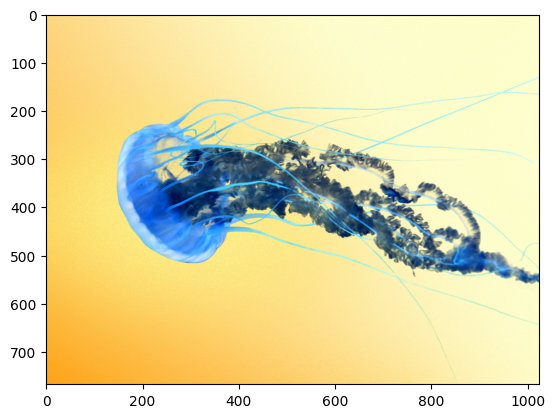

In [4]:

# Инверсия цвета изображения через сервер
def inv_color(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xmlrpc.client.Binary(pimg)
    
    #img_bin2 = server.inversion(img_bin)
    img_bin2 = server.inversion(img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_inv = inv_color(img_arr)

# Изображение с инверсией цвета
imshow(img_arr_inv)

In [ ]:
#print (server.in_black_list(u'Петров'))
#print (server.in_black_list(u'Примеров'))
print( 'black_list_check:', server.in_black_list('Петров'))

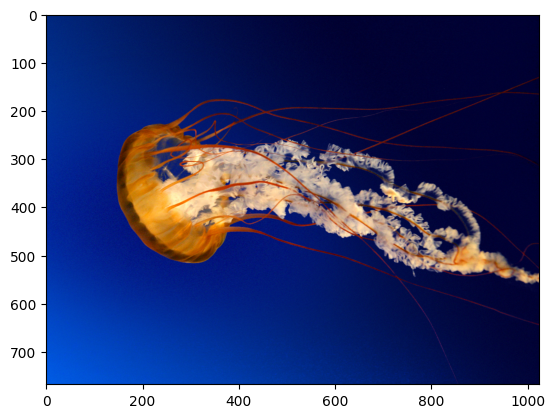

In [17]:
#Зеркальное отображение

pimg = pickle.dumps(img_arr)
img_bin = xmlrpc.client.Binary(pimg)
#mirr_img_bin = server.mirror(img_bin)
mirr_img_bin = server.mirror(img_bin)
img_arr = pickle.loads(mirr_img_bin.data)
imshow(img_arr)

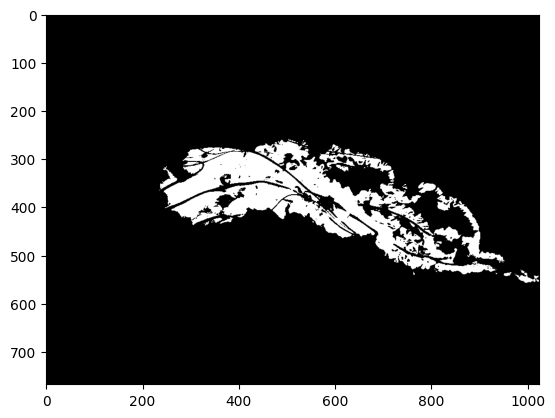

In [18]:
#Бинаризация изображения

pimg = pickle.dumps(img_arr)
img_bin = xmlrpc.client.Binary(pimg)
threshold = 100
#binary_img_bin = server.picture_binarisation(img_bin, porog)
binary_img_bin = server.picture_binarisation(img_bin, threshold)
binary_img_bin = pickle.loads(binary_img_bin.data)

imshow(binary_img_bin)

In [13]:
try:
    print(stats_server.logs())
except ConnectionRefusedError:
     print('Сервер недоступен')

[['2023-11-20 12:22:04', 'Черный список'], ['2023-11-20 12:22:08', 'Черный список'], ['2023-11-20 12:27:32', 'Ping'], ['2023-11-20 12:27:36', 'Now'], ['2023-11-20 12:27:40', 'Type'], ['2023-11-20 12:27:44', 'Sum'], ['2023-11-20 12:27:49', 'Pow'], ['2023-11-20 12:27:54', 'Bin'], ['2023-11-20 12:27:58', 'Bin'], ['2023-11-20 12:28:03', 'Inversion'], ['2023-11-20 12:28:08', 'Flip'], ['2023-11-20 12:28:13', 'Badboys'], ['2023-11-20 12:28:17', 'Badboys'], ['2023-11-20 12:30:04', 'Ping'], ['2023-11-20 12:30:08', 'Now'], ['2023-11-20 12:30:12', 'Type'], ['2023-11-20 12:30:16', 'Sum'], ['2023-11-20 12:30:20', 'Pow'], ['2023-11-20 12:42:14', 'Ping'], ['2023-11-20 12:42:19', 'Now'], ['2023-11-20 12:42:23', 'Type'], ['2023-11-20 12:42:27', 'Sum'], ['2023-11-20 12:42:31', 'Pow'], ['2023-11-20 12:49:00', 'Ping'], ['2023-11-20 12:49:04', 'Now'], ['2023-11-20 12:49:08', 'Type'], ['2023-11-20 12:49:12', 'Sum'], ['2023-11-20 12:49:16', 'Pow'], ['2023-11-20 12:49:21', 'Bin'], ['2023-11-20 12:49:26', 'Bin

In [9]:
try:
    print(stats_server.logs_slice_by_operation('Type'))
except ConnectionRefusedError:
    print('Сервер недоступен')

[['2023-11-20 12:27:40', 'Type'], ['2023-11-20 12:30:12', 'Type'], ['2023-11-20 12:42:23', 'Type'], ['2023-11-20 12:49:08', 'Type'], ['2023-11-20 12:59:24', 'Type'], ['2023-11-20 19:05:29', 'Type']]


In [10]:
try:
    print(stats2_server.get_all_logs())
except ConnectionRefusedError:
    print('Сервер недоступен')

[[1, 'ping', '20231204T21:03:58', 2.034080982208252], [2, 'now', '20231204T21:04:04', 2.0514774322509766], [3, 'to_binary', '20231204T21:04:12', 2.290374279022217], [4, 'inversion', '20231204T21:04:19', 7.444960594177246], [5, 'in_black_list', '20231204T21:04:31', 2.063237190246582], [6, 'ping', '20231204T21:04:36', 2.0578930377960205], [7, 'mirror', '20231204T21:04:40', 3.2076830863952637], [8, 'now', '20231204T21:04:46', 2.040814161300659], [9, 'picture_binarisation', '20231204T21:04:50', 4.666481256484985], [10, 'show_type', '20231204T21:04:57', 2.0445830821990967], [11, 'show_type', '20231204T21:05:03', 2.0408518314361572], [12, 'show_type', '20231204T21:05:09', 2.056058645248413], [13, 'test_sum', '20231204T21:05:15', 2.03127121925354], [14, 'test_pow', '20231204T21:05:21', 2.0476717948913574], [15, 'ping', '20231204T21:17:13', 2.020561695098877], [16, 'now', '20231204T21:17:19', 2.0423200130462646], [17, 'to_binary', '20231204T21:17:26', 2.2756145000457764], [18, 'inversion', '20

In [14]:
try:
    print(stats2_server.get_logs('ping', '2023-12-01 12:02:09', '2023-12-05 19:02:21', 5))
except ConnectionRefusedError:
    print('Сервер недоступен')

Сервер недоступен
